<a href="https://colab.research.google.com/github/krutika731/Ames-House-price-prediction/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

# New Section

In [153]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [2]:
uploaded = files.upload()

Saving train.csv to train (2).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.api.types as ptypes
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import StratifiedKFold

In [0]:
df_train = pd.read_csv('train (3).csv')

In [155]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
uploaded_test = files.upload()

MessageError: ignored

In [0]:
df_test = pd.read_csv('test (1).csv')

In [159]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [160]:
df_test.shape

(1459, 80)

In [161]:
df_train.shape

(1460, 81)

In [162]:
#finding out the columns having more than 800 records null
df_train.columns[df_train.isnull().sum()>800]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [0]:
df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


In [164]:
df_train.shape

(1460, 77)

In [165]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [0]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

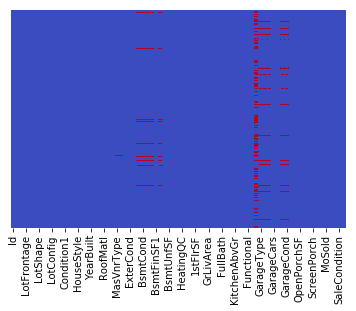

In [168]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [0]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType'] = df_train['GarageType'] .fillna(df_train['GarageType'].mode()[0])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].mean())
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])



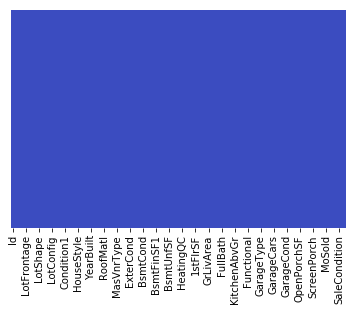

In [170]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [0]:
df_train.drop(['Id'],axis=1,inplace=True)

In [79]:
df_train.shape

(1460, 76)

In [172]:
df_test.shape

(1459, 80)

In [0]:
#Handling test data
df_test.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [175]:
df_test.shape

(1459, 75)

In [176]:
 df_test.columns[df_test.isnull().sum()>0]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [0]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['Utilities'] = df_train['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['BsmtQual'] = df_train['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['Exterior1st'] = df_train['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_train['Exterior2nd'] .fillna(df_test['Exterior2nd'].mode()[0])
df_test['MasVnrType'] = df_train['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtQual'] = df_train['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_train['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF'] = df_train['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())
df_test['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean())
df_test['KitchenQual'] = df_train['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_train['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType'] = df_train['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish'] = df_train['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageCars'] = df_train['GarageCars'].fillna(df_test['GarageCars'].mode()[0])
df_test['GarageArea'] = df_train['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['GarageQual'] = df_train['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_train['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['SaleType'] = df_train['SaleType'].fillna(df_test['SaleType'].mode()[0])

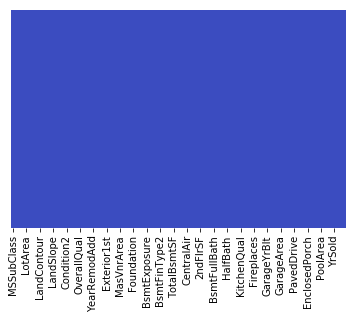

In [178]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [179]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [180]:
df_train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].tail()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
1455,0,0,953
1456,790,163,589
1457,275,0,877
1458,49,1029,0
1459,830,290,136


In [144]:
df_test[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].tail()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
1454,410,0,811,1221
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


In [181]:
#Dropping BsmtFinSF1,BsmtFinSF2 and BsmtUnfSF as toy can get value if all of them in 'TotalBsmtSF'
df_train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
df_test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
df_train.shape,df_test.shape

((1460, 73), (1459, 72))

In [182]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPo

In [0]:
house_categorical_cols = [col for col in df_train.columns if df_train[col].dtype == np.object]

In [0]:
df_train['istrain'] = 1
df_test['istrain'] = 0

In [244]:
df_final = pd.concat([df_train,df_test],axis=0)
df_final.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 74)

In [0]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
df_final_copy = df_final.copy()

In [0]:
def dummy_coding_categorical_column(columns,df_copy):
  for col in columns:
    print(col)
    df_dummy_col = pd.get_dummies(df_copy[col],drop_first=True)
    df_copy = pd.concat([df_copy,df_dummy_col],axis=1,)
    df_copy.drop(col,axis=1,inplace=True)
  return df_copy
    

In [247]:
df_final_copy = dummy_coding_categorical_column(house_categorical_cols,df_final_copy)
df_final_copy.shape

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


(2919, 235)

In [252]:
df_final_copy =df_final_copy.loc[:,~df_final_copy.columns.duplicated()]
df_final_copy.shape

(2919, 175)

In [253]:
df_train_copy = df_final_copy[df_final_copy['istrain']==1]
df_test_copy = df_final_copy[df_final_copy['istrain']==0]
df_train_copy.shape, df_test_copy.shape

((1460, 175), (1459, 175))

In [254]:
df_train_copy.drop('istrain',axis=1,inplace=True)
df_test_copy.drop('istrain',axis=1,inplace=True)
df_train_copy.shape, df_test_copy.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((1460, 174), (1459, 174))

In [262]:
df_train_copy['PosA'].value_counts()

0    1452
1       8
Name: PosA, dtype: int64

In [263]:
#finding low variance columns in training data
low_var_cols_train = []
for col in df_train_copy.columns:
    if np.max(df_train_copy[col].value_counts(normalize=True)) > 0.99:
        low_var_cols_train.append(col)
low_var_cols_train

['PoolArea',
 'Pave',
 'IR3',
 'NoSeWa',
 'FR3',
 'Sev',
 'Blueste',
 'NPkVill',
 'Veenker',
 'PosA',
 'RRAe',
 'RRNe',
 'RRNn',
 '1.5Unf',
 '2.5Fin',
 '2.5Unf',
 'Gambrel',
 'Mansard',
 'Shed',
 'Membran',
 'Metal',
 'Roll',
 'Tar&Grv',
 'WdShake',
 'WdShngl',
 'AsphShn',
 'BrkComm',
 'CBlock',
 'ImStucc',
 'Stone',
 'Brk Cmn',
 'Other',
 'Fa',
 'Po',
 'Wood',
 'Grav',
 'OthW',
 'Wall',
 'FuseP',
 'Mix',
 'Maj2',
 'CarPort',
 'CWD',
 'Con',
 'ConLD',
 'ConLI',
 'ConLw',
 'Oth',
 'AdjLand',
 'Alloca']

In [264]:
#removing low variance columns
df_train_copy.drop(low_var_cols_train,axis=1,inplace=True)
df_train_copy.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1460, 124)

In [265]:
#finding low variance columns in training data
low_var_cols_test = []
for col in df_test_copy.columns:
    if np.max(df_test_copy[col].value_counts(normalize=True)) > 0.99:
        low_var_cols_test.append(col)
low_var_cols_test

['3SsnPorch',
 'LowQualFinSF',
 'PoolArea',
 'RH',
 'Pave',
 'IR3',
 'NoSeWa',
 'FR3',
 'Sev',
 'Blueste',
 'BrDale',
 'NPkVill',
 'Veenker',
 'PosA',
 'RRNe',
 'RRNn',
 '1.5Unf',
 '2.5Fin',
 '2.5Unf',
 'Gambrel',
 'Mansard',
 'Shed',
 'Membran',
 'Metal',
 'Roll',
 'Tar&Grv',
 'WdShake',
 'WdShngl',
 'AsphShn',
 'BrkComm',
 'CBlock',
 'ImStucc',
 'Stone',
 'Brk Cmn',
 'Other',
 'Po',
 'Wood',
 'GasA',
 'GasW',
 'Grav',
 'OthW',
 'Wall',
 'FuseP',
 'Mix',
 'Maj2',
 'CarPort',
 'CWD',
 'Con',
 'ConLD',
 'ConLI',
 'ConLw',
 'Oth',
 'AdjLand',
 'Alloca']

In [266]:
#removing low variance columns
df_test_copy.drop(low_var_cols_test,axis=1,inplace=True)
df_test_copy.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1459, 120)

In [0]:
df

In [278]:
# fig = plt.figure(figsize=(40,20))
# ax = fig.gca()
corr_train = df_train_copy.corr()
corr_train
# mask = np.zeros_like(corr_train)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr_train, mask=mask, vmax=1, square=True, annot=True,cmap="YlGnBu")

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,FV,RH,RL,RM,IR2,Reg,HLS,...,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,CmentBd,Wd Shng,None,Gd,TA,PConc,Slab,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Y,FuseF,SBrkr,Min1,Min2,Typ,Attchd,Basment,BuiltIn,Detchd,RFn,P,New,WD,Family,Normal,Partial
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.244671,0.001956,-0.065292,0.410531,0.380637,0.489782,0.439317,0.182240,0.566024,-0.119916,0.068101,0.299475,0.414266,-0.014241,-0.251758,0.342160,-0.021096,0.031372,0.211671,-0.144203,0.476224,0.605852,0.088758,0.409516,0.819530,0.235459,0.281986,0.240379,-0.013604,-0.095486,-0.039343,0.304731,-0.267029,0.040544,-0.183320,0.046425,...,-0.075292,-0.149450,0.117180,0.027710,0.070483,-0.051757,-0.038827,0.080482,-0.062502,-0.319151,0.208732,-0.312844,0.197188,-0.014789,0.019861,-0.261178,-0.050224,0.246405,-0.024210,-0.040611,-0.148904,0.046435,0.005826,0.146953,-0.076036,0.124403,0.057323,0.032032,-0.090531,0.288983,0.054845,-0.035598,-0.311059,0.128655,-0.062613,0.221219,-0.198056,0.021949,-0.158772,0.221037
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.169494,-0.023855,0.061989,0.194561,0.421378,0.138347,0.183926,0.052291,0.687501,0.609707,0.059306,0.050986,0.072483,0.063353,0.307886,0.174019,0.016197,0.035164,0.208026,0.028942,0.295493,0.319334,0.040606,0.616423,-0.174512,0.092165,0.010308,0.140024,-0.028700,0.114848,0.027199,-0.099247,0.041907,0.074735,-0.070998,0.015072,...,-0.040588,-0.027906,-0.074586,0.055923,0.109556,-0.014845,-0.027508,0.016276,0.035256,-0.019309,0.182685,-0.188984,0.183758,-0.037968,0.043015,0.097178,-0.093950,0.019671,0.014937,-0.040954,0.160495,-0.045102,0.075972,-0.011803,-0.014304,0.051441,-0.049221,0.017601,0.010180,-0.161606,-0.038734,0.376067,-0.013069,-0.008631,0.012140,0.010810,0.026769,-0.027180,0.031766,0.004852
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,-0.000106,0.035114,-0.037305,0.011257,0.035353,0.035087,0.035765,0.015905,0.020643,-0.004972,-0.024600,0.020423,0.062335,-0.004296,-0.043825,0.018795,0.000354,0.029474,-0.005842,0.025504,0.030371,0.044584,-0.031436,-0.006683,0.037384,-0.032771,0.031355,0.045286,0.018645,-0.025113,-0.012246,0.051525,-0.038708,0.021249,-0.036857,0.040932,...,0.059884,-0.049003,0.012302,-0.015356,-0.008214,-0.011975,-0.015665,-0.006072,-0.019018,-0.043657,0.014869,-0.025626,0.008892,-0.015040,-0.019224,0.020425,0.062595,0.024703,-0.026882,-0.010516,-0.038295,0.017416,-0.012998,0.030692,-0.015969,0.008536,-0.017135,0.003731,0.018594,0.043525,-0.013359,-0.012967,-0.043393,0.089249,-0.016851,0.019596,-0.014211,-0.013711,-0.009177,0.018526
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.150673,0.046519,0.041570,0.107570,0.363252,0.065253,0.086106,-0.056782,0.521270,0.226651,0.198597,0.119690,0.237023,0.105607,-0.023438,0.102417,0.007767,0.046544,0.093810,0.012980,0.101676,0.168213,0.044300,0.676620,0.050450,0.046854,-0.070651,-0.040581,-0.036014,-0.066453,0.065644,0.139264,-0.126983,0.027839,-0.054831,-0.006105,...,0.062337,-0.067185,0.004572,0.021617,-0.014441,0.035016,-0.009700,-0.029559,-0.025978,-0.067702,-0.019268,0.036360,-0.024661,0.007963,0.028881,0.101373,-0.020128,-0.137813,0.041673,0.078120,0.090708,-0.007308,0.071577,0.007872,-0.014923,0.048944,-0.034139,0.064272,-0.034435,-0.036982,0.018806,0.168524,-0.051972,-0.008591,0.017802,-0.050702,0.047667,0.062656,0.021903,-0.057949
BsmtFullBath,0.244671,-0.169494,-0.000106,-0.150673,1.000000,-0.147871,-0.049911,0.137928,-0.064512,0.179189,0.131881,0.105716,0.034836,-0.030905,-0.041503,0.158155,0.091481,-0.047143,0.003491,0.085055,-0.023047,-0.025361,0.067341,-0.054942,0.111098,0.227122,0.023148,-0.053275,0.307351,0.175315,0.187599,0.119470,0.067049

In [290]:
corr_train[corr_train>0.80].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,FV,RH,RL,RM,IR2,Reg,HLS,...,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,CmentBd,Wd Shng,None,Gd,TA,PConc,Slab,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Y,FuseF,SBrkr,Min1,Min2,Typ,Attchd,Basment,BuiltIn,Detchd,RFn,P,New,WD,Family,Normal,Partial
1stFlrSF,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3SsnPorch,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFullBath,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
corr_train[corr_train>0.80].head()

KeyError: ignored

In [288]:
corr_train[corr_train>0.80].isnull().sum()<=122

1stFlrSF          True
2ndFlrSF          True
3SsnPorch        False
BedroomAbvGr     False
BsmtFullBath     False
BsmtHalfBath     False
EnclosedPorch    False
Fireplaces       False
FullBath         False
GarageArea        True
GarageCars        True
GarageYrBlt      False
GrLivArea         True
HalfBath         False
KitchenAbvGr     False
LotArea          False
LotFrontage      False
LowQualFinSF     False
MSSubClass       False
MasVnrArea       False
MiscVal          False
MoSold           False
OpenPorchSF      False
OverallCond      False
OverallQual      False
SalePrice        False
ScreenPorch      False
TotRmsAbvGrd      True
TotalBsmtSF       True
WoodDeckSF       False
                 ...  
Gd               False
TA               False
PConc            False
Slab             False
Mn               False
No               False
BLQ              False
GLQ              False
LwQ              False
Rec              False
Unf              False
GasA             False
GasW       